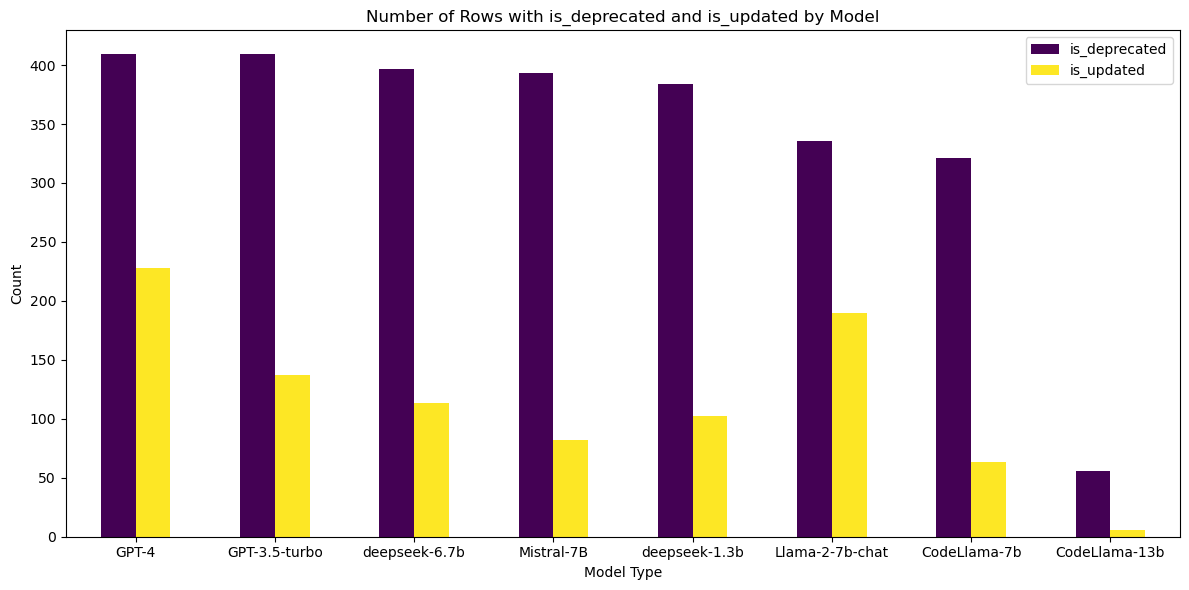

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

csv_files = {'GPT-4': 'results/gpt-4-turbo-preview.csv', 'Llama-2-7b-chat': 'results/Llama-2-7b-chat-hf.csv' , 'Mistral-7B': 'results/Mistral-7B-Instruct-v0.2.csv' , 'GPT-3.5-turbo': 'results/gpt-3.5-turbo-0125.csv', 'deepseek-6.7b': 'results/deepseek-coder-6.7b-instruct.csv', 'deepseek-1.3b': 'results/deepseek-coder-1.3b-instruct.csv', 'CodeLlama-13b': 'results/CodeLlama-13b-Instruct-hf.csv', 'CodeLlama-7b': 'results/CodeLlama-7b-Instruct-hf.csv'}

dfs = {model: pd.read_csv(file) for model, file in csv_files.items()}

for model, df in dfs.items():
    df['model'] = model
df = pd.concat(dfs.values())

count_df = df.groupby(['model'])[['is_deprecated', 'is_updated']].sum()
count_df = count_df.sort_values(by=['is_deprecated', 'is_updated'], ascending=False)


fig, ax = plt.subplots(figsize=(12, 6))

count_df.plot(kind='bar', ax=ax, cmap='viridis')
ax.set_title('Number of Rows with is_deprecated and is_updated by Model')
ax.set_xlabel('Model Type')
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=0)
#ax.legend(title='Condition')

plt.tight_layout()
plt.show()


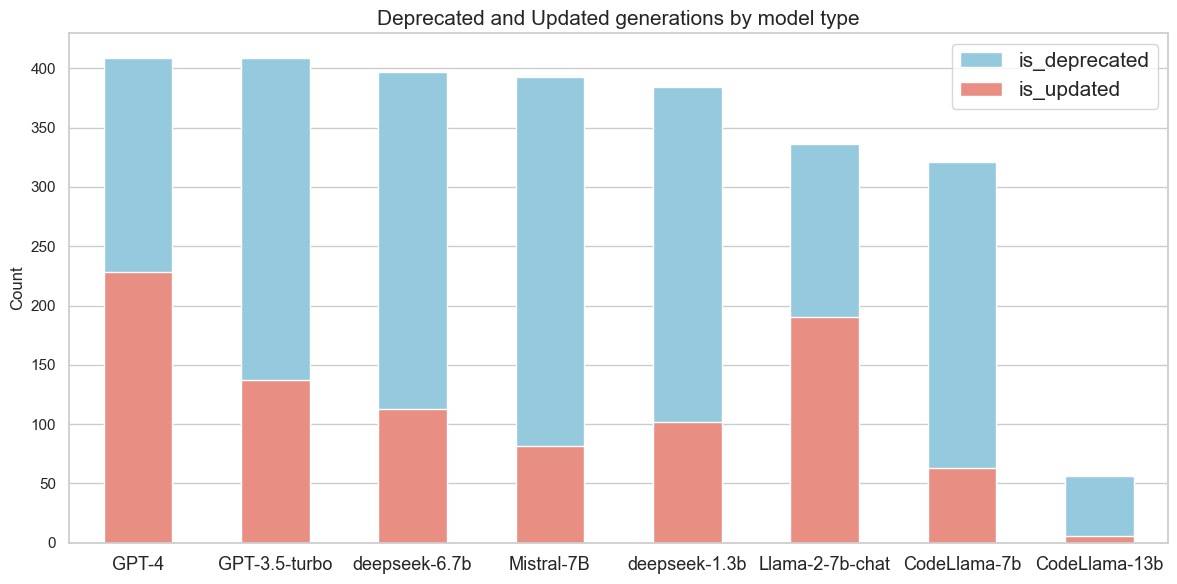

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

csv_files = {
    'GPT-4': 'results/gpt-4-turbo-preview.csv',
    'Llama-2-7b-chat': 'results/Llama-2-7b-chat-hf.csv',
    'Mistral-7B': 'results/Mistral-7B-Instruct-v0.2.csv',
    'GPT-3.5-turbo': 'results/gpt-3.5-turbo-0125.csv',
    'deepseek-6.7b': 'results/deepseek-coder-6.7b-instruct.csv',
    'deepseek-1.3b': 'results/deepseek-coder-1.3b-instruct.csv',
    'CodeLlama-13b': 'results/CodeLlama-13b-Instruct-hf.csv',
    'CodeLlama-7b': 'results/CodeLlama-7b-Instruct-hf.csv'
}

dfs = {model: pd.read_csv(file) for model, file in csv_files.items()}

for model, df in dfs.items():
    df['model'] = model

df = pd.concat(dfs.values())

count_df = df.groupby(['model'])[['is_deprecated', 'is_updated']].sum()
count_df = count_df.sort_values(by=['is_deprecated', 'is_updated'], ascending=False)

# Set seaborn style
sns.set(style="whitegrid")

# Create a grouped bar plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=count_df.reset_index(), x='model', y='is_deprecated', color='skyblue', label='is_deprecated', width=0.5)
sns.barplot(data=count_df.reset_index(), x='model', y='is_updated', color='salmon', label='is_updated', width=0.5)
plt.title('Deprecated and Updated generations by model type', fontsize=15)
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(rotation=0, ha='center', fontsize=13)
plt.legend(fontsize=15)
plt.tight_layout()
plt.show()


<Figure size 3000x600 with 0 Axes>

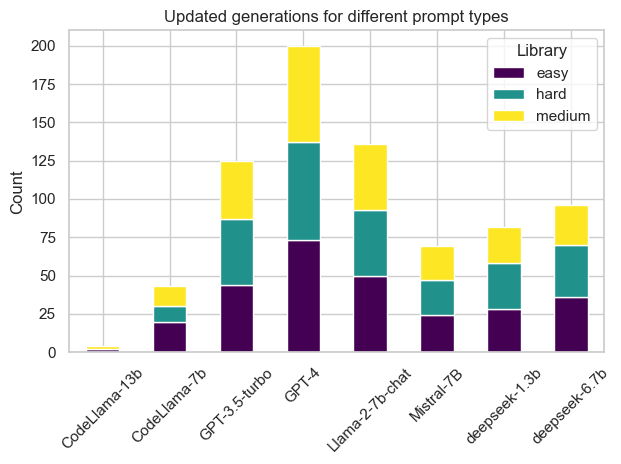

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#csv_files = {'model1': 'results/gpt-4-turbo-preview.csv', 'model2': 'results/Llama-2-7b-chat-hf.csv' , 'model3': 'results/Mistral-7B-Instruct-v0.2.csv' , 'model4': 'results/gpt-3.5-turbo-0125.csv', 'model5': 'results/deepseek-coder-6.7b-instruct.csv', 'model6': 'results/deepseek-coder-1.3b-instruct.csv', 'model7': 'results/CodeLlama-13b-Instruct-hf.csv', 'model8': 'results/CodeLlama-7b-Instruct-hf.csv'}

csv_files = {
    'GPT-4': 'results/gpt-4-turbo-preview.csv',
    'Llama-2-7b-chat': 'results/Llama-2-7b-chat-hf.csv',
    'Mistral-7B': 'results/Mistral-7B-Instruct-v0.2.csv',
    'GPT-3.5-turbo': 'results/gpt-3.5-turbo-0125.csv',
    'deepseek-6.7b': 'results/deepseek-coder-6.7b-instruct.csv',
    'deepseek-1.3b': 'results/deepseek-coder-1.3b-instruct.csv',
    'CodeLlama-13b': 'results/CodeLlama-13b-Instruct-hf.csv',
    'CodeLlama-7b': 'results/CodeLlama-7b-Instruct-hf.csv'
}


dfs = {model: pd.read_csv(file) for model, file in csv_files.items()}

for model, df in dfs.items():
    df['model'] = model
df = pd.concat(dfs.values())

deprecated_updated = df[(df['is_deprecated'] == 1) & (df['is_updated'] == 1)]

updated_counts = deprecated_updated.groupby(['model', 'prompt_type']).size().unstack(fill_value=0)

plt.figure(figsize=(30, 6))
updated_counts.plot(kind='bar', stacked=True, cmap='viridis')
plt.title('Updated generations for different prompt types')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Library')
plt.tight_layout()
plt.show()
